¡Hola Rachel! Como te va?

Mi nombre es Emanuel Fitta! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Buen día Rachel! Dejame felicitarte por el gran trabajo que has realizado, has desarrollado gráficos muy interesantes a los cuales se les puede sacar muchos insights. Verdaderamente creo que realizaste un excelente proyecto, profundizas bastante en lo que los datos nos dicen y se nota rigurosidad en tus procedimientos, análsisi y test estadísticos. Lo hiciste de manera excepcional. Así que no me queda más que desearte mucho éxito, éxito que estoy seguro que tendrás. Sin más, fue un gusto poder revisar tu proyecto, ten un gran día.
    



# Evaluación y Priorización de Hipótesis de Marketing para Incrementar Ingresos de una Tienda Online mediante Prueba A/B

Introducción

Este proyecto busca identificar y validar estrategias de marketing para incrementar ingresos en una tienda online. El objetivo es priorizar hipótesis potenciales y evaluar su impacto a través de una prueba A/B.


Objetivo

Priorizar hipótesis para seleccionar las más prometedoras en términos de impacto.
Evaluar resultados del test A/B comparando ingresos acumulados, tamaño promedio de pedido y tasa de conversión entre grupos.
Tomar decisiones basadas en análisis estadísticos sobre la implementación de estrategias.


Etapas de Análisis

Priorización de Hipótesis: 
Aplicar los frameworks ICE y RICE para ordenar las hipótesis y seleccionar las más efectivas.

Análisis del Test A/B: 
Comparar ingresos, tamaño de pedido y tasas de conversión acumuladas entre los grupos de prueba.

Analizar la significancia estadística en diferencias de conversión y tamaño de pedido.

Identificar valores anómalos mediante percentiles y determinar patrones en pedidos y precios.

Decisión Final: Evaluar si es conveniente implementar las hipótesis basándose en los resultados del test A/B.



Conclusión

Al final de este análisis sabremos identificar las mejores estrategias de marketing para aumentar ingresos y tomar decisiones fundamentadas sobre las pruebas A/B 

Comenzamos con el análisis de los datos. En esta etapa, revisaremos la información disponible, evaluaremos su formato y corregiremos cualquier posible error de formato.

In [1]:
# Importamos las librerías que usaremos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt
from scipy.stats import mannwhitneyu

In [2]:
# Cargamos los data sets que utilizaremos 
hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien utilizado el parámetro sep para leer correctamente el archivo.

In [3]:
# Verificamos la información que contiene el dataset hipótesis
hipotesis.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
# Analizamos la informacion del DF hipotesis 
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# Verificamos que no tenga valores nulos
hipotesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

In [6]:
# Verificamos que no tenga valores duplicados
hipotesis.duplicated().sum()

0

In [7]:
# Verificamos la información que contiene el dataset orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [8]:
# Analizamos la informacion del DF orders 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [9]:
# Verificamos que no tenga valores nulos
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
# Verificamos que no tenga valores duplicados
orders.duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto al revisar duplicados y nulos, es fundamental realizar este paso para limpiar el dataframe.

In [11]:
# Convertimos la columna 'date' a formato datetime
orders['date'] = pd.to_datetime(orders['date'],format= '%Y-%m-%d %H:%M:%S')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [12]:
# Verificamos la información que contiene el dataset visits
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
# Analizamos la informacion del DF visits 
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
# Verificamos que no tenga valores nulos
visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [15]:
# Verificamos que no tenga valores duplicados
visits.duplicated().sum()

0

In [16]:
# Convertimos la columna 'date' a formato datetime
visits['date'] = pd.to_datetime(visits['date'],format= '%Y-%m-%d %H:%M:%S')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Correcto Rachel! Transformar a formato de fecha es lo mejor para evitar problemas más adelante.

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Después del análisis de los datos, observamos que, en los data frames orders y visits, las fechas estaban en un formato incorrecto, por lo que las convertimos al formato datetime.


A continuación, procederemos al análisis para priorizar las hipótesis. Para ello:

Aplicaremos el framework ICE (Impacto, Confianza, Facilidad), que nos permite clasificar las hipótesis en función de su impacto potencial, la confianza en los resultados y la facilidad de implementación.

Luego aplicaremos el framework RICE (Impacto, Confianza, Facilidad, Alcance), que incluye un factor adicional, el alcance, que mide cuántos usuarios o personas se verían beneficiados por la hipótesis.

Finalmente, compararemos los resultados de ambos métodos y explicaremos cómo y por qué cambia la priorización de hipótesis al utilizar RICE en lugar de ICE.

In [17]:
# Creamos la columna ICE y ordenamos de mayor a menor 
hipotesis['ICE'] = hipotesis['Impact']*hipotesis['Confidence']/hipotesis['Effort']
hipotesis = hipotesis.sort_values(by='ICE', ascending=False)
hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


In [18]:
# Identificamos la hipótesis que tiene mayor ICE
hipotesis.iloc[0,0]

'Launch a promotion that gives users discounts on their birthdays'

In [19]:
# Creamos la columna RICE y ordenamos de mayor a menor 
hipotesis['RICE'] = (hipotesis['Reach']*hipotesis['Impact']*hipotesis['Confidence'])/hipotesis['Effort']
hipotesis = hipotesis.sort_values(by='RICE', ascending=False)
hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [20]:
# Identificamos la hipótesis que tiene mayor ICE
hipotesis.iloc[0,0]

'Add a subscription form to all the main pages. This will help you compile a mailing list'

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien! Has calculado de manera correcat tanto ICE como RICE. Y precisamente, la conclusión que obtienes es correcta. 

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Los análisis con ICE y RICE muestran que la hipótesis 7 es la mejor opción para probar. Aunque en ICE la hipótesis 8 ("Lanzar una promoción que ofrezca descuentos a los usuarios en sus cumpleaños") obtiene la puntuación más alta, al considerar el alcance con RICE, la hipótesis 7 ("Agregar un formulario de suscripción en todas las páginas principales para ayudar a compilar una lista de correos") pasa a ser la prioridad. Esto sugiere que la hipótesis 7 no solo es viable en impacto y confianza, sino que también puede beneficiar a un mayor número de usuarios, maximizando su impacto general.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Excelente por las conclusiones que obtuviste! Te felicito

A continuación, realizaremos un análisis del test A/B con los siguientes pasos:

1.- Representaremos gráficamente el ingreso acumulado por grupo.

2.- Representaremos gráficamente el tamaño de pedido promedio acumulado por grupo. 

3.- Representaremos gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. 

4.- Calcularemos la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representaremos gráficamente las tasas de conversión diarias de los dos grupos y describiremos la diferencia. 

5.- Trazaremos un gráfico de dispersión del número de pedidos por usuario. 

6.- Calcularemos los percentiles 95 y 99 del número de pedidos por usuario. Definiremos el punto en el cual un punto de datos se convierte en una anomalía.

7.- Trazaremos un gráfico de dispersión de los precios de los pedidos. 

8.- Calcularemos los percentiles 95 y 99 de los precios de los pedidos. Definiremos el punto en el cual un punto de datos se convierte en una anomalía.

9.- Encontraremos la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. 

10.- Encuentraremos la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. 

11.- Encuentraremos la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. 

12.- Encuentraremos la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. 

13.- Tomaremos una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Eso! Tener un plan es una gran idea! Además me parecen correctos cada uno de los pasos que pensaste!

In [21]:
# Revisamos nuevamente el contenido del df Orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [22]:
# Primero revisaremos si no existen usuarios duplicados en ambos grupos 
orders.duplicated(subset=['visitorId','group']).sum()

108

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Hemos comprobado que existen datos duplicados. Por ahora, no eliminaremos los duplicados en ambos grupos, ya que pueden ser útiles para nuestro análisis. Por ejemplo, aunque los usuarios aparezcan en ambos grupos, podemos observar en cuál grupo realizan la compra más rápidamente. Sin embargo, eliminaremos los duplicados durante el análisis de compra, ya que podrían afectar métricas clave como el número de pedidos y la tasa de conversión. Esto nos permitirá obtener resultados más precisos y representativos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien pensado! 

In [23]:
# Filtramos combinaciones únicas de 'date' y 'group' y las ordenamos por fecha.
groups_by_date = orders[['date','group']].drop_duplicates().sort_values(by='date')
groups_by_date.head()

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B
291,2019-08-03,A


In [24]:
# Identificamos a los usuarios que realizaron compras el mismo dia en ambos grupos, 
# sin llamar a los usuarios que se encontraron en ambos grupos
users_in_two_groups = orders.groupby(['visitorId','date'])['group'].nunique().sort_values(ascending=False).reset_index().query('group>1')
users_in_two_groups['visitorId'].head()

0    2587333274
1     477780734
2    2579882178
3    2038680547
4    1316129916
Name: visitorId, dtype: int64

In [25]:
# Filtramos el DataFrame 'orders' para excluir usuarios que están en ambos grupos. 
# Agrupamos los datos por fecha y grupo, calculando el número único de transacciones y visitantes, y sumando los ingresos. 
# Finalmente, ordenamos los resultados por fecha y grupo para facilitar el análisis.
orders_agg = orders[~orders['visitorId'].isin(users_in_two_groups['visitorId'])].groupby(['date','group']).agg({
    'transactionId':'nunique',
    'visitorId': 'nunique',
    'revenue':'sum'
}).reset_index().sort_values(by=['date','group'])
orders_agg.head()

,date,group,transactionId,visitorId,revenue
0,2019-08-01,A,23,19,2266.6
1,2019-08-01,B,19,19,1258.8
2,2019-08-02,A,20,19,1503.5
3,2019-08-02,B,24,23,2623.8
4,2019-08-03,A,24,24,1815.2


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien, loagraste aplicar correctamente la función groupby para identificar visitantes en ambos grupos.

In [26]:
# Agrupamos el DataFrame 'visits' por fecha y grupo, sumando el número de visitas por cada combinación. 
# Luego, ordenamos los resultados por fecha y grupo para facilitar el análisis.
visits_agg = visits.groupby(['date','group']).agg({
    'visits':'sum'
}).reset_index().sort_values(by=['date','group'])
visits_agg.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,619
3,2019-08-02,B,581
4,2019-08-03,A,507


In [27]:
# Combinamos 'orders_agg' y 'visits_agg' en un nuevo DataFrame, 'fct_experiment', 
# mediante una unión externa en las columnas 'date' y 'group' para incluir todas las combinaciones de ambas tablas.
# Renombramos las columnas para mayor claridad.
fct_experiment = orders_agg.merge(visits_agg, on = ['date','group'], how = 'outer' )
fct_experiment.columns = ['date','group','total_orders','total_buyers','total_sales','total_visits']
fct_experiment.head()

,date,group,total_orders,total_buyers,total_sales,total_visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,19,19,1258.8,713
2,2019-08-02,A,20,19,1503.5,619
3,2019-08-02,B,24,23,2623.8,581
4,2019-08-03,A,24,24,1815.2,507


In [28]:
# Filtramos para obtener solo los datos del grupo A, seleccionando las columnas de fecha, total de órdenes y total de ventas.
sales_group_A = fct_experiment.query('group=="A"')[['date', 'total_orders','total_sales']]
sales_group_A.head()

,date,total_orders,total_sales
0,2019-08-01,23,2266.6
2,2019-08-02,20,1503.5
4,2019-08-03,24,1815.2
6,2019-08-04,12,990.6
8,2019-08-05,24,1978.1


In [29]:
# Filtramos para obtener solo los datos del grupo B, seleccionando las columnas de fecha, total de órdenes y total de ventas.
sales_group_B = fct_experiment.query('group=="B"')[['date', 'total_orders','total_sales']]
sales_group_B.head()

,date,total_orders,total_sales
1,2019-08-01,19,1258.8
3,2019-08-02,24,2623.8
5,2019-08-03,16,1806.8
7,2019-08-04,15,1661.8
9,2019-08-05,21,1449.3


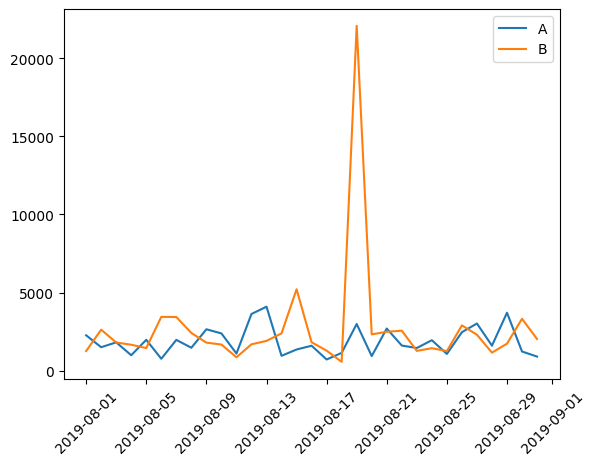

In [30]:
# 1.- Representación gráfica del ingreso acumulado por grupo
plt.plot(sales_group_A['date'],sales_group_A['total_sales'],label='A')
plt.plot(sales_group_B['date'],sales_group_B['total_sales'],label='B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien, el gráfico fue una excelente idea. Te dejo una pequeña sugerencia, no olvides colocar títulos a tus gráficos, así como nombres de los ejes, eso los haría mucho más legibles. Por otro lado, no lo mencioné antes, pero te felicito por colocar tus observaciones en cada paso que das, es un gran hábito que te ayudará en el futuro.

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Aunque en algunos momentos las ventas en ambos grupos son similares, hay días en los que predomina el grupo B, especialmente entre el 17 y el 21 de agosto, donde se observa un incremento sustancial en sus ventas.

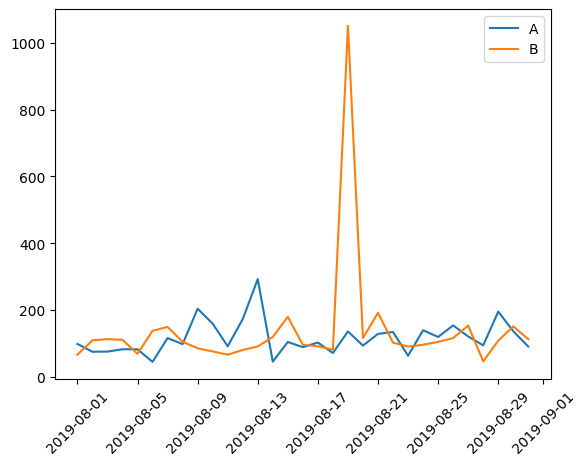

In [31]:
#2.-Representación gráfica del tamaño de pedido promedio acumulado por grupo:
plt.plot(sales_group_A['date'], sales_group_A['total_sales']/sales_group_A['total_orders'], label='A')
plt.plot(sales_group_B['date'], sales_group_B['total_sales']/sales_group_B['total_orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [32]:
sales_group_A['total_sales'].mean()

1872.209677419355

In [33]:
sales_group_B['total_sales'].mean()

2714.5774193548395

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Como se observa en la gráfica anterior, del 5 al 13 de agosto el promedio de ventas fue ligeramente más alto en el grupo A. Sin embargo, en las demás fechas los resultados son muy similares, destacándose nuevamente el pico de aumento en el grupo B entre el 17 y el 21 de agosto. Al calcular las medias, también se corrobora que el grupo B tiene un promedio de ventas mayor.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Es correcto! Parece que en general el grupo Btiene un promedio de ventas mayor.

In [34]:
# Creamos un DataFrame que combina la información de ventas de ambos grupos (A y B) en función de la fecha.
cumulative_sales_two_groups = sales_group_A.merge(sales_group_B, how='outer', on='date', suffixes=['A','B'])
cumulative_sales_two_groups.head()

,date,total_ordersA,total_salesA,total_ordersB,total_salesB
0,2019-08-01,23,2266.6,19,1258.8
1,2019-08-02,20,1503.5,24,2623.8
2,2019-08-03,24,1815.2,16,1806.8
3,2019-08-04,12,990.6,15,1661.8
4,2019-08-05,24,1978.1,21,1449.3


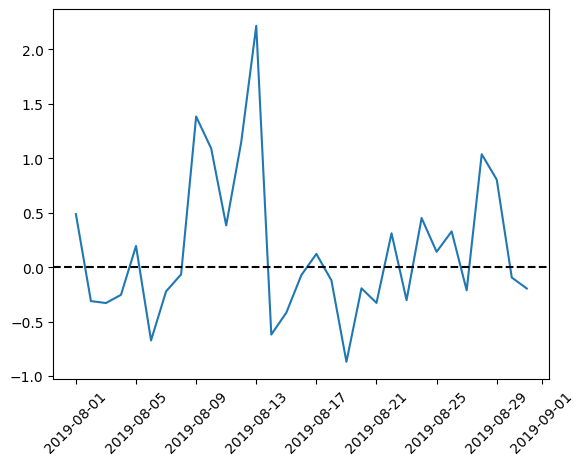

In [35]:
# 3.- Diferencia relativa en el tamaño de pedido promedio acumulado:
plt.plot(cumulative_sales_two_groups['date'],(cumulative_sales_two_groups['total_salesA']/cumulative_sales_two_groups['total_ordersA'])/(cumulative_sales_two_groups['total_salesB']/cumulative_sales_two_groups['total_ordersB'])-1)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Gran parte de los picos en azul sobrepasan la línea de referencia en cero, esto indica que el tamaño de pedido promedio acumulado del grupo B es mayor que el del grupo A en esos períodos. Esto sugiere que los usuarios del grupo B tienden a realizar pedidos de mayor valor promedio que los del grupo A en esas fechas, lo cual podría ser relevante para entender el comportamiento de gasto entre los grupos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Bien realizado.

In [36]:
# Calculamos el porcentaje de conversión de clientes, basado en el total de órdenes y visitas de cada día.
fct_experiment['convertion'] = (fct_experiment['total_orders'] / fct_experiment['total_visits'])*100
fct_experiment.head()

,date,group,total_orders,total_buyers,total_sales,total_visits,convertion
0,2019-08-01,A,23,19,2266.6,719,3.198887
1,2019-08-01,B,19,19,1258.8,713,2.664797
2,2019-08-02,A,20,19,1503.5,619,3.231018
3,2019-08-02,B,24,23,2623.8,581,4.130809
4,2019-08-03,A,24,24,1815.2,507,4.733728


In [37]:
# Dividimos el DF en dos: uno para el grupo A y otro para el grupo B, facilitando el análisis individual de cada grupo.
experiment_A = fct_experiment.query('group=="A"')
experiment_B = fct_experiment.query('group=="B"')

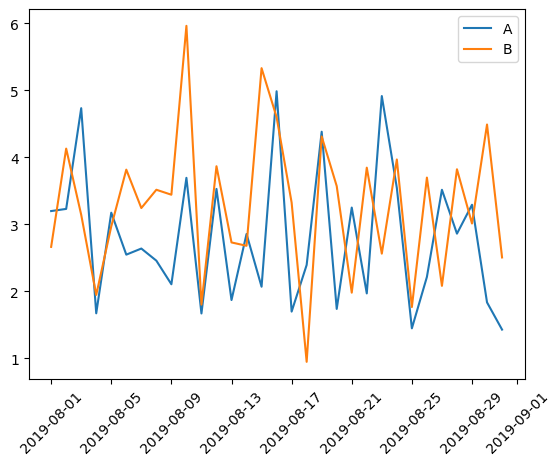

In [38]:
#4.- Gráfica del cálculo de la tasa de conversión y comparación entre grupos:
plt.plot(experiment_A['date'],experiment_A['convertion'], label='A')
plt.plot(experiment_B['date'],experiment_B['convertion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    
En la gráfica anterior, que muestra la tasa de conversión diaria de los grupos A y B a lo largo del tiempo, podemos observar que ambos grupos presentan fluctuaciones similares y alternan en días donde uno supera al otro. El grupo B tiene algunos picos más altos, aunque también muestra caídas más pronunciadas en el período del 17 al 21 de agosto, mientras que el grupo A es más estable.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Excelente análisis el que estás realizando, me gusta el enfoque que estás dando y el nivel de profundidad al que estás analizando las diferencias de ambos grupos.

In [39]:
# Unimos los datos de los experimentos A y B por la columna 'date', manteniendo todas las fechas y diferenciando 
# las columnas 'convertion' con los sufijos 'A' y 'B'.
conversion_group_union = experiment_A[['date', 'convertion']].merge(experiment_B[['date', 'convertion']], 
    on='date', 
    how='outer', 
    suffixes=('A', 'B'))
conversion_group_union.head()

,date,convertionA,convertionB
0,2019-08-01,3.198887,2.664797
1,2019-08-02,3.231018,4.130809
2,2019-08-03,4.733728,3.143418
3,2019-08-04,1.673640,1.948052
4,2019-08-05,3.174603,2.970297


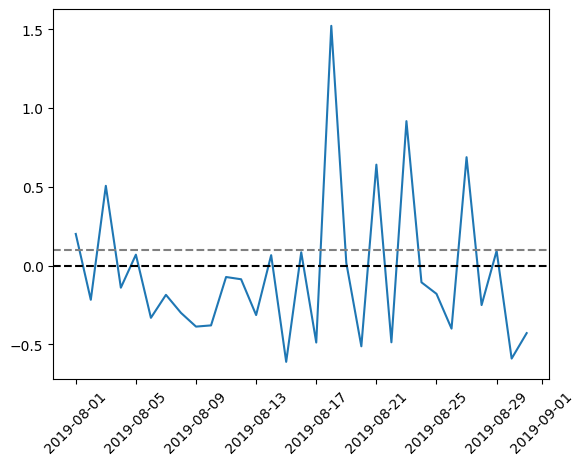

In [40]:
# Graficamos la diferencia relativa en las tasas de conversión entre los grupos A y B a lo largo del tiempo,
# marcando una línea horizontal en 0 (sin diferencia) y otra en 0.1 (para visualizar una diferencia del 10%).
plt.plot(conversion_group_union['date'],conversion_group_union['convertionA']/conversion_group_union['convertionB']-1 )
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
El gráfico anterior muestra la comparación porcentual entre el grupo B y el grupo A, destacando que el grupo B presenta una mejor tasa de conversión. Los picos que aparecen por encima de la línea gris (que representa una diferencia relativa de 0.1) indican que, en esos días, el grupo B superó al grupo A en tasa de conversión por más de un 10%. Estos picos reflejan momentos en los que el desempeño del grupo B fue significativamente superior al del grupo A.

In [41]:
# Eliminamos columnas no necesarias, agrupamos por 'visitorId' y calculamos el número de transacciones únicas por usuario,
# renombramos las columnas y ordenamos los usuarios por el número de pedidos en orden descendente.
orders_by_users = orders.drop(['group','revenue','date'], axis=1).groupby('visitorId', as_index=False).agg({
    'transactionId':'nunique'
})
orders_by_users.columns = ['user_id','orders']
orders_by_users.sort_values(ascending=False, by='orders',inplace=True)
orders_by_users.head()

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


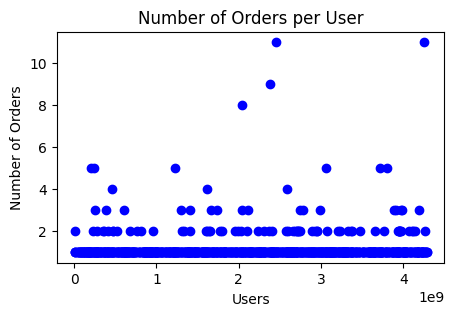

In [42]:
# 5.- Gráfico de dispersión del número de pedidos por usuario:
plt.figure(figsize=(5, 3))
plt.scatter(orders_by_users['user_id'], orders_by_users['orders'], color='blue')
plt.xlabel('Users')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per User')
plt.show()

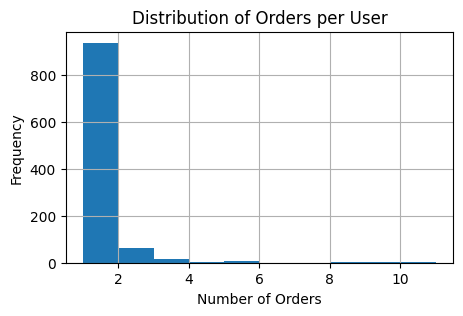

In [43]:
# Creamos un histograma para una mejor comprension
plt.figure(figsize=(5, 3))
orders_by_users['orders'].hist()
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.title('Distribution of Orders per User')
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
En las gráficas anteriores se muestra la cantidad de pedidos por usuario. Se observa que la mayoría de los usuarios realizan una sola compra, seguidos por aquellos que hacen dos compras. Además, solo hay 4 usuarios que realizan entre 8 y 11 pedidos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Es correcto! Estos podrían considerarse como valores atípicos, solamente deberiamos comprobarlo.

In [44]:
# 6.- Cálculo de los percentiles del número de pedidos por usuario:

#Calculamos los percentiles 90, 95 y 99, esto para identificar cuántos pedidos por usuario podrían considerarse outliers. 

np.percentile(orders_by_users['orders'],[90, 95,99])

array([1., 2., 4.])

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
El 90% de los usuarios realizaron 1 pedido o menos, el 95% hicieron 2 pedidos o menos, y el 99% de los usuarios no superaron los 4 pedidos. Esto sugiere que la gran mayoría de los usuarios realizan pocos pedidos, mientras que solo un pequeño porcentaje realiza un número significativamente mayor de pedidos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Se comprueba que los valores de pedidos altos son outliers! Así que todo empiaza a ser congruente.

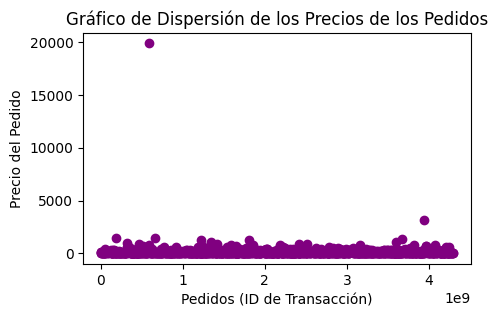

In [45]:
# 7. Gráfico de dispersión de los precios de los pedidos
plt.figure(figsize=(5, 3))
plt.scatter(orders['transactionId'], orders['revenue'], color='purple')
plt.xlabel('Pedidos (ID de Transacción)')
plt.ylabel('Precio del Pedido')
plt.title('Gráfico de Dispersión de los Precios de los Pedidos')
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
La mayoría de los precios de los pedidos se encuentran por debajo de los 5000, lo que indica que la mayoría de los clientes realizan compras en rangos de precio más bajos. Sin embargo, se observa una excepción significativa con un pedido de 20000, lo que sugiere que existe un pequeño número de compras mucho más altas, posiblemente impulsadas por factores específicos como productos de mayor valor, compras al por mayor o un error en la facturación.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Quiero resaltar que en este caso, colocaste títulos tanto al gráfico como a los ejes y precisamente, este se puede leer más facilmente, así que muy bien por esto!

In [46]:
# 8. Calculamos los percentiles 90, 95 y 99 de los precios de los pedidos
percentiles_precios = np.percentile(orders['revenue'], [90, 95, 99])
print("Percentil 90 de los precios de pedidos:", percentiles_precios[0])
print("Percentil 95 de los precios de pedidos:", percentiles_precios[1])
print("Percentil 99 de los precios de pedidos:", percentiles_precios[2])

# Definimos el umbral para identificar anomalías en precios de pedidos (percentil 99)
umbral_anomalia_precios = percentiles_precios[2]
print("Umbral para anomalías en precios de pedidos (percentil 99):", umbral_anomalia_precios)


Percentil 90 de los precios de pedidos: 282.4800000000004
Percentil 95 de los precios de pedidos: 435.54
Percentil 99 de los precios de pedidos: 900.9039999999999
Umbral para anomalías en precios de pedidos (percentil 99): 900.9039999999999


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Los precios de los pedidos muestran que el 90% de las compras son de 282.48 o menos, mientras que el 95% se encuentra por debajo de 435.54, y el 99% por debajo de 900.90. Esto indica que la mayoría de los pedidos tienen un precio relativamente bajo, con solo el 1% de las compras superando el umbral de 900.90, considerado como el límite para posibles anomalías en precios de pedidos. Estos datos sugieren que los pedidos de precios muy altos son excepcionales y ocurren en una minoría de casos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Me parece que el análisis exploratorio que realizas hasta ahora es muy completo y justamente ahora, con todo eso estás en posición para empezar a realizar los test.

In [54]:
# 9. Significancia estadística de la diferencia en la conversión entre los grupos (datos en bruto)

# Calculamos el número de órdenes y visitas por grupo y fecha
orders_by_group_date = orders.groupby(['date', 'group']).agg({
    'transactionId': 'nunique', 
}).reset_index()

visits_by_group_date = visits.groupby(['date', 'group']).agg({
    'visits': 'sum'  
}).reset_index()

# Unimos los datos de órdenes y visitas para cada grupo
conversion_data = orders_by_group_date.merge(visits_by_group_date, on=['date', 'group'])
conversion_data['conversion_rate'] = conversion_data['transactionId'] / conversion_data['visits']

conversion_data.head()

,date,group,transactionId,visits,conversion_rate
0,2019-08-01,A,24,719,0.033380
1,2019-08-01,B,21,713,0.029453
2,2019-08-02,A,20,619,0.032310
3,2019-08-02,B,24,581,0.041308
4,2019-08-03,A,24,507,0.047337


In [55]:
# Separamos las tasas de conversión por grupo
conversion_A = conversion_data[conversion_data['group'] == 'A']['conversion_rate']
conversion_B = conversion_data[conversion_data['group'] == 'B']['conversion_rate']

# Aplicamos la prueba de Mann-Whitney
stat, p_valor_conversion = mannwhitneyu(conversion_A, conversion_B, alternative='two-sided')
print("P-valor de la diferencia en la tasa de conversión entre grupos (Mann-Whitney):", p_valor_conversion)

if p_valor_conversion < 0.05:
    print("Hay una diferencia significativa en la tasa de conversión entre los grupos A y B.")
else:
    print("No hay una diferencia significativa en la tasa de conversión entre los grupos A y B.")


P-valor de la diferencia en la tasa de conversión entre grupos (Mann-Whitney): 0.08587216033007773
No hay una diferencia significativa en la tasa de conversión entre los grupos A y B.


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
En los datos donde calculamos la significancia estadística de la diferencia en la conversión entre los grupos (datos en bruto), pudimos notar que el p-valor de 0.0859 sugiere que no hay suficiente evidencia para confirmar una diferencia real en la tasa de conversión entre los grupos A y B. Dado que el p-valor es mayor que el umbral estándar de 0.05, cualquier diferencia observada entre los grupos podría ser solo por azar, y no podemos concluir que uno de los grupos tenga una tasa de conversión significativamente mejor que el otro.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Correcto! Lo único que sugeriría, es que creo que valdría mucho la pena profundizar en porque se decidió utilizar un test mannwhitney. E incluso hacer los test previos necesarios para justificar su uso. Esto sería solamente para robustecer tu resultado. Fuera de eso, veo correcto lo demás incluso la interpretación del pvalue. Así que te felicito por ello.

In [48]:
# 10. Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos (datos en bruto)

# Extraemos los ingresos de cada pedido para cada grupo
tamaño_pedido_A = orders[orders['group'] == 'A']['revenue']
tamaño_pedido_B = orders[orders['group'] == 'B']['revenue']

# Aplicamos la prueba de Mann-Whitney
stat, p_valor_tamaño_pedido = mannwhitneyu(tamaño_pedido_A, tamaño_pedido_B, alternative='two-sided')
print("P-valor de la diferencia en el tamaño promedio de pedido entre grupos (Mann-Whitney):", p_valor_tamaño_pedido)

if p_valor_tamaño_pedido < 0.05:
    print("Hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.")
else:
    print("No hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.")


P-valor de la diferencia en el tamaño promedio de pedido entre grupos (Mann-Whitney): 0.6915246773264736
No hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;"><div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Al realizar el análisis para encontrar la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos (datos en bruto), notamos que el p-valor de 0.6915 indica que no hay evidencia estadística suficiente para concluir que existe una diferencia en el tamaño promedio de pedido entre los grupos A y B. Dado que el p-valor es mucho mayor que el umbral estándar de 0.05, cualquier diferencia observada es probablemente resultado del azar. En resumen, no se puede afirmar que uno de los grupos tenga un tamaño promedio de pedido significativamente diferente del otro.

In [49]:
# 11. Significancia estadística de la diferencia en la conversión (datos filtrados)
# Extraemos las tasas de conversión de cada grupo
conversion_A = experiment_A['convertion']
conversion_B = experiment_B['convertion']

# Prueba de Mann-Whitney U para la tasa de conversión
stat, p_value = mannwhitneyu(conversion_A, conversion_B, alternative='two-sided')
print("Estadístico U:", stat)
print("p-valor:", p_value)

if p_value < 0.05:
    print("La diferencia en la tasa de conversión entre los grupos es estadísticamente significativa.")
else:
    print("No hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos.")


Estadístico U: 340.0
p-valor: 0.04872384162663466
La diferencia en la tasa de conversión entre los grupos es estadísticamente significativa.


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Al buscar la significancia estadística de la diferencia en la conversión (datos filtrados), notamos que la diferencia en las tasas de conversión entre los grupos es estadísticamente significativa, con un p-valor de 0.0487. Esto indica que la diferencia observada no es producto del azar y que existe una diferencia real en las tasas de conversión entre los grupos analizados.



<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Muy bien!

In [50]:
# 12. Significancia estadística de la diferencia en el tamaño promedio de pedido (datos filtrados)
# Calculamos el tamaño promedio de pedido para cada grupo
size_order_A = sales_group_A['total_sales'] / sales_group_A['total_orders']
size_order_B = sales_group_B['total_sales'] / sales_group_B['total_orders']

# Prueba de Mann-Whitney U para el tamaño promedio de pedido
stat, p_value = mannwhitneyu(size_order_A, size_order_B, alternative='two-sided')
print("Estadístico U:", stat)
print("p-valor:", p_value)

if p_value < 0.05:
    print("La diferencia en el tamaño promedio de pedido entre los grupos es estadísticamente significativa.")
else:
    print("No hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.")


Estadístico U: 494.0
p-valor: 0.854781183252115
No hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Al realizar el análisis de significancia estadística de la diferencia en el tamaño promedio de pedido (datos filtrados, podemos notar que el tamaño promedio de pedido entre los grupos no muestra una diferencia estadísticamente significativa, con un p-valor de 0.8548. Esto sugiere que no hay evidencia suficiente para afirmar que exista una diferencia real en el tamaño de los pedidos entre los grupos analizados.

13.- Tomaremos una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Decisión: 1.- Parar la prueba, considerar a uno de los grupos como líder.
Aunque no se ha encontrado una diferencia significativa en el tamaño promedio de los pedidos, sí hay una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B (p-valor de 0.0487), lo que sugiere que el grupo B tiene un mejor rendimiento en este aspecto.

Dado que la tasa de conversión es un KPI clave, la decisión más lógica es detener la prueba y considerar al grupo B como el líder. El tamaño promedio de pedido no afecta esta decisión, ya que no hay evidencia de una diferencia relevante en esa área.

No se optó por continuar con la prueba, ya que podría implicar más tiempo y recursos sin beneficios adicionales. Dado que ya se ha identificado una diferencia significativa en la tasa de conversión, lo más eficiente es finalizar la prueba y tomar decisiones basadas en los resultados actuales.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien! Te felicito por un análisis tan completo y por profundizar en cada punto.

Conclusión general:

El análisis de las pruebas A/B en la tienda online ha proporcionado valiosa información para evaluar el impacto de diferentes estrategias de marketing. A continuación, se resumen los hallazgos clave:

Tasas de conversión: La diferencia en las tasas de conversión entre los grupos A y B es estadísticamente significativa (p-valor de 0.0487), lo que sugiere que el grupo B tiene un desempeño significativamente mejor que el otro. Esto podría ser un indicativo de que alguna de las estrategias implementadas tiene un efecto real en la conversión de usuarios.

Tamaño promedio de pedido: No se encontró una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B, tanto en los datos filtrados como en los no filtrados (p-valor de 0.8548 en ambos casos). Esto indica que las estrategias implementadas no tuvieron un impacto claro sobre el valor promedio de los pedidos y cualquier diferencia observada probablemente se deba al azar.

Impacto de las estrategias de marketing: A partir del análisis de priorización de hipótesis con las metodologías ICE y RICE, se seleccionó la hipótesis 7 (agregar un formulario de suscripción en todas las páginas principales) como la estrategia más prometedora, dado su mayor alcance potencial y su capacidad de beneficiar a una mayor cantidad de usuarios. Aunque la hipótesis 8 mostró una alta puntuación en ICE, la hipótesis 7 tiene un mayor impacto potencial al considerar la combinación de impacto, confianza y alcance.

Comportamiento de los usuarios: A pesar de algunas fluctuaciones diarias en las ventas, en general, el grupo B mostró un desempeño superior en términos de tasa de conversión en varios días clave, especialmente entre el 17 y el 21 de agosto, lo que sugiere que la estrategia aplicada en el grupo B podría estar favoreciendo a un segmento de usuarios específico.

Anomalías en los precios y pedidos: Aunque la mayoría de los pedidos son de bajo valor, se observan algunas compras significativamente más altas, lo que podría estar relacionado con productos de mayor valor o situaciones excepcionales (como errores en la facturación).

Resumen final:

El análisis muestra que, aunque las estrategias probadas no tuvieron un impacto significativo en el tamaño promedio de pedido, sí hubo una diferencia significativa en las tasas de conversión, lo que podría ser el factor más relevante para aumentar los ingresos. La hipótesis 7, que busca aumentar la base de usuarios suscritos, parece ser la más prometedora para futuras pruebas.